# II - Redes Densas

## Importar librerias

In [1]:
import numpy as np
import time
import matplotlib.pyplot as plt

import tensorflow as tf

In [2]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D

from tensorflow.keras.metrics import MSE
from tensorflow.keras.optimizers import Adadelta
from tensorflow.keras.losses import categorical_crossentropy

from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import mnist

## Parametros de entrenamiento

Documentacion piola que explica la diferencia entre:
 - Epochs
 - Lote
 - Muestra
 
[link](https://machinelearningmastery.com/difference-between-a-batch-and-an-epoch/)

**Una muestra** es 1 fila de datos

**Lote** representa la cantidad de muestras para trabajar antes de actualizar los parámetros del modelo interno

**Epoca** representa la cantidad de veces que el algoritmo de aprendizaje funcionará en todo el conjunto de datos de entrenamiento.

Un ejemplo:

Dataset: 200 filas

Lote: 5

Epocas: 1000

Esto significa que el conjunto de datos se dividirá en **40 lotes**, cada uno con cinco muestras. **Los pesos del modelo** se actualizarán después de cada lote de cinco muestras.

Esto también significa que una época implicará 40 lotes o **40 actualizaciones del modelo.**

Con 1000 épocas, **el modelo estará expuesto o pasará por todo el conjunto de datos 1000 veces**. Eso es un total de 40.000 lotes durante todo el proceso de formación.

In [6]:
lr = 1.0 #Learning rate
epochs = 30 # El total de ejemplos de entrenamiento en cada iteración
batch_size = 256 # La red va a ver 256 ejemplos hacia adelante y luego se va a retropropagar
np.random.seed(14) #Instancio una semilla


11490434/11490434 [==============================] - 1s 0us/step


((array([[[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         ...,
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0

In [3]:
tf.config.list_physical_devices(
    device_type=None
)

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]

## Cargar y visualizar el dataset

In [9]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
n_classes = np.max(np.unique(y_train)) + 1
n_classes

10

In [12]:
x_train

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

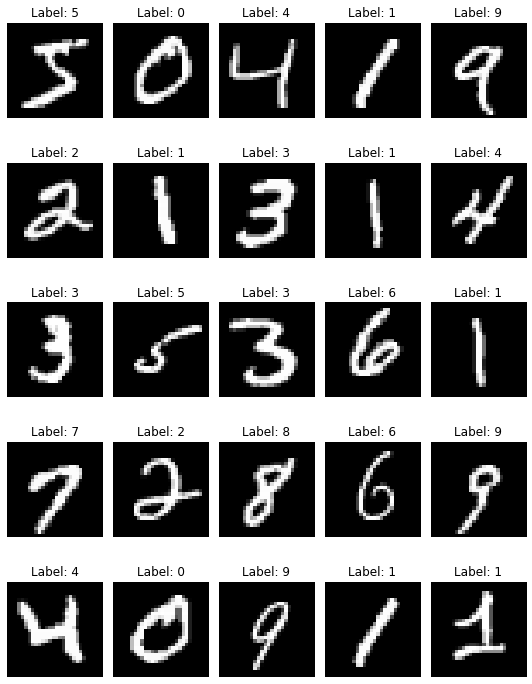

In [11]:
num = 25
images = x_train[:num]
labels = y_train[:num]
num_row = 5
num_col = 5
fig, axes = plt.subplots(num_row, num_col, figsize=(1.5*num_col,2*num_row))
for i in range(num):
    ax = axes[i//num_col, i%num_col]
    ax.imshow(images[i], cmap='gray')
    ax.set_title('Label: {}'.format(labels[i]))
    ax.axis('off')
plt.tight_layout()
plt.show()

## Preparacion de los datos

In [13]:
#Convertimos los pixeles a decimales
#Luego al dividirlo dejamos todo en un rango del 0 a 1

x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

In [8]:
y_train[123]

7

In [22]:
y_train = to_categorical(y_train, n_classes)
y_test = to_categorical(y_test, n_classes) #one-hot encoding

y_train[123,:]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.], dtype=float32)

In [23]:
x_train.shape = (x_train.shape[0], np.prod(x_train.shape[1:]))
x_test.shape = (x_test.shape[0], np.prod(x_test.shape[1:]))

In [24]:
x_train.shape

(60000, 784)

## Crear el modelo

In [25]:
# Model
#---------------------------------------------------------------------#
input_layer = Input(shape=x_train.shape[1:])
dense_1 = Dense(500, activation='relu') (input_layer)
dropout_1 = Dropout(0.25) (dense_1) # ctrl + / Dropout desconecta un 25% de las conexiones
dense_2 = Dense(500, activation='relu') (dropout_1)
dropout_2 = Dropout(0.25) (dense_2)
dense_3 = Dense(100, activation='relu') (dropout_2)
dropout_3 = Dropout(0.25) (dense_3)
output_layer = Dense(n_classes, activation='softmax') (dropout_3)
#---------------------------------------------------------------------#
model = Model(input_layer, output_layer)

In [26]:
Adadelta_optimizer = Adadelta(learning_rate=lr, rho=0.95)
model.compile(optimizer=Adadelta_optimizer, loss='categorical_crossentropy', metrics=['acc', 'mse'])
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense_4 (Dense)             (None, 500)               392500    
                                                                 
 dropout_3 (Dropout)         (None, 500)               0         
                                                                 
 dense_5 (Dense)             (None, 500)               250500    
                                                                 
 dropout_4 (Dropout)         (None, 500)               0         
                                                                 
 dense_6 (Dense)             (None, 100)               50100     
                                                                 
 dropout_5 (Dropout)         (None, 100)               0   

## Entrenar el modelo

In [27]:
start_time = time.time()
history = model.fit(x_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(x_test, y_test), shuffle=True, verbose=1)
end_time = time.time()
print('\nElapsed Dense Model training time: {:.5f} seconds'.format(end_time-start_time))

Epoch 1/30
235/235 [==============================] - 11s 39ms/step - loss: 0.4230 - acc: 0.8688 - mse: 0.0189 - val_loss: 0.1489 - val_acc: 0.9525 - val_mse: 0.0069
Epoch 2/30
235/235 [==============================] - 10s 44ms/step - loss: 0.1593 - acc: 0.9524 - mse: 0.0073 - val_loss: 0.1058 - val_acc: 0.9675 - val_mse: 0.0050
Epoch 3/30
235/235 [==============================] - 9s 39ms/step - loss: 0.1165 - acc: 0.9651 - mse: 0.0053 - val_loss: 0.0869 - val_acc: 0.9724 - val_mse: 0.0041
Epoch 4/30
235/235 [==============================] - 9s 38ms/step - loss: 0.0900 - acc: 0.9732 - mse: 0.0041 - val_loss: 0.0757 - val_acc: 0.9765 - val_mse: 0.0036
Epoch 5/30
235/235 [==============================] - 11s 46ms/step - loss: 0.0745 - acc: 0.9778 - mse: 0.0035 - val_loss: 0.0677 - val_acc: 0.9802 - val_mse: 0.0031
Epoch 6/30
235/235 [==============================] - 10s 41ms/step - loss: 0.0625 - acc: 0.9809 - mse: 0.0030 - val_loss: 0.0692 - val_acc: 0.9789 - val_mse: 0.0032
Epoch 

## Evaluar el proceso de entrenamiento

In [28]:
history.history.keys()

dict_keys(['loss', 'acc', 'mse', 'val_loss', 'val_acc', 'val_mse'])

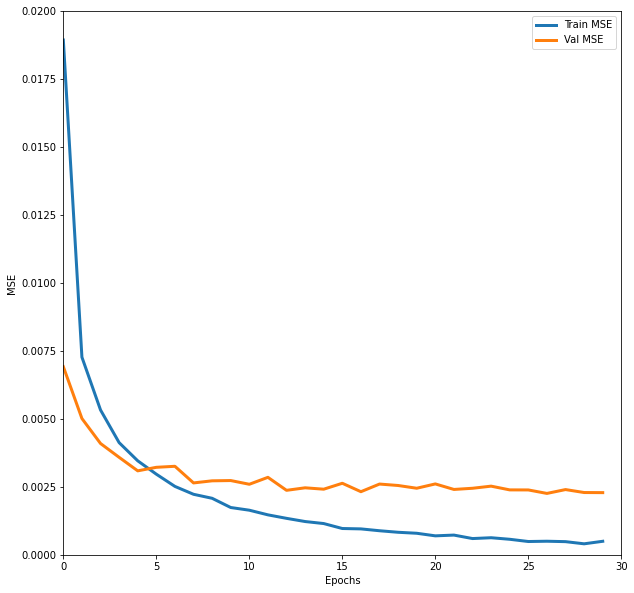

In [29]:
f = plt.figure(figsize=(10,10))
plt.plot(history.history['mse'], linewidth=3, label='Train MSE')
plt.plot(history.history['val_mse'], linewidth=3, label='Val MSE')
plt.xlabel('Epochs')
plt.ylabel('MSE')
plt.axis([0, 30, 0, 0.02])
plt.legend(loc='upper right')
plt.show()

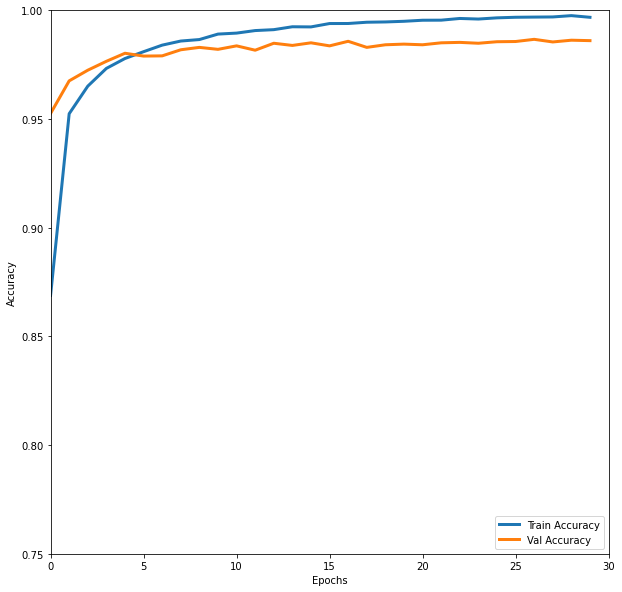

In [30]:
f = plt.figure(figsize=(10,10))
plt.plot(history.history['acc'], linewidth=3, label='Train Accuracy')
plt.plot(history.history['val_acc'], linewidth=3, label='Val Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.axis([0, 30, 0.75, 1])
plt.legend(loc='lower right')

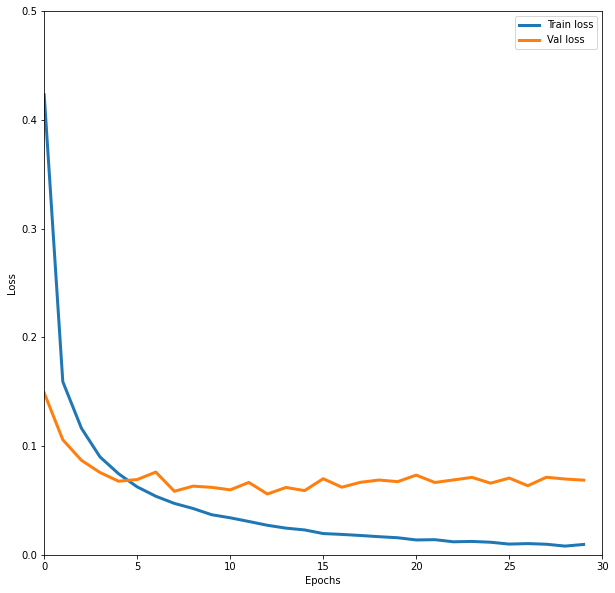

In [31]:
f = plt.figure(figsize=(10,10))
plt.plot(history.history['loss'], linewidth=3, label='Train loss')
plt.plot(history.history['val_loss'], linewidth=3, label='Val loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.axis([0, 30, 0, 0.5])
plt.legend(loc='upper right')

## Predicciones sobre una imagen individual

In [35]:
x_single_test = x_train[0] # primera imagen del dataset, visualizada arriba
y_single_test = y_train[0] # primera etiqueta del dataset, visualizada arriba
x_single_test.shape = (1, x_single_test.shape[0])
y_single_test.shape = (1, y_single_test.shape[0])

In [36]:
model.predict(x_single_test, verbose=1)

#El 99,98% de que el valor se trata de un 5

1/1 [==============================] - 0s 14ms/step


array([[5.8686437e-21, 2.1974572e-21, 8.8459990e-24, 5.7204330e-09,
        4.0823318e-25, 1.0000000e+00, 1.7756645e-19, 6.3803543e-19,
        1.6003356e-18, 1.8310471e-13]], dtype=float32)

In [34]:
model.evaluate(x_single_test, y_single_test,verbose=1)

1/1 [==============================] - 0s 35ms/step - loss: 0.0000e+00 - acc: 1.0000 - mse: 3.2723e-18


[0.0, 1.0, 3.2723353954513624e-18]